In [ ]:
pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n model for transfer learning
model = YOLO('yolov8n.pt')

print("YOLOv8 model loaded successfully:")
print(model)

YOLOv8 model loaded successfully:
YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=


Found https://cdn.prod.website-files.com/680a070c3b99253410dd3df5/69288730c05081b367341556_Collision-prediction_Fig 1.webp locally at 69288730c05081b367341556_Collision-prediction_Fig 1.webp
image 1/1 /content/69288730c05081b367341556_Collision-prediction_Fig 1.webp: 384x640 1 person, 3 cars, 2 buss, 43.5ms
Speed: 1.6ms preprocess, 43.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


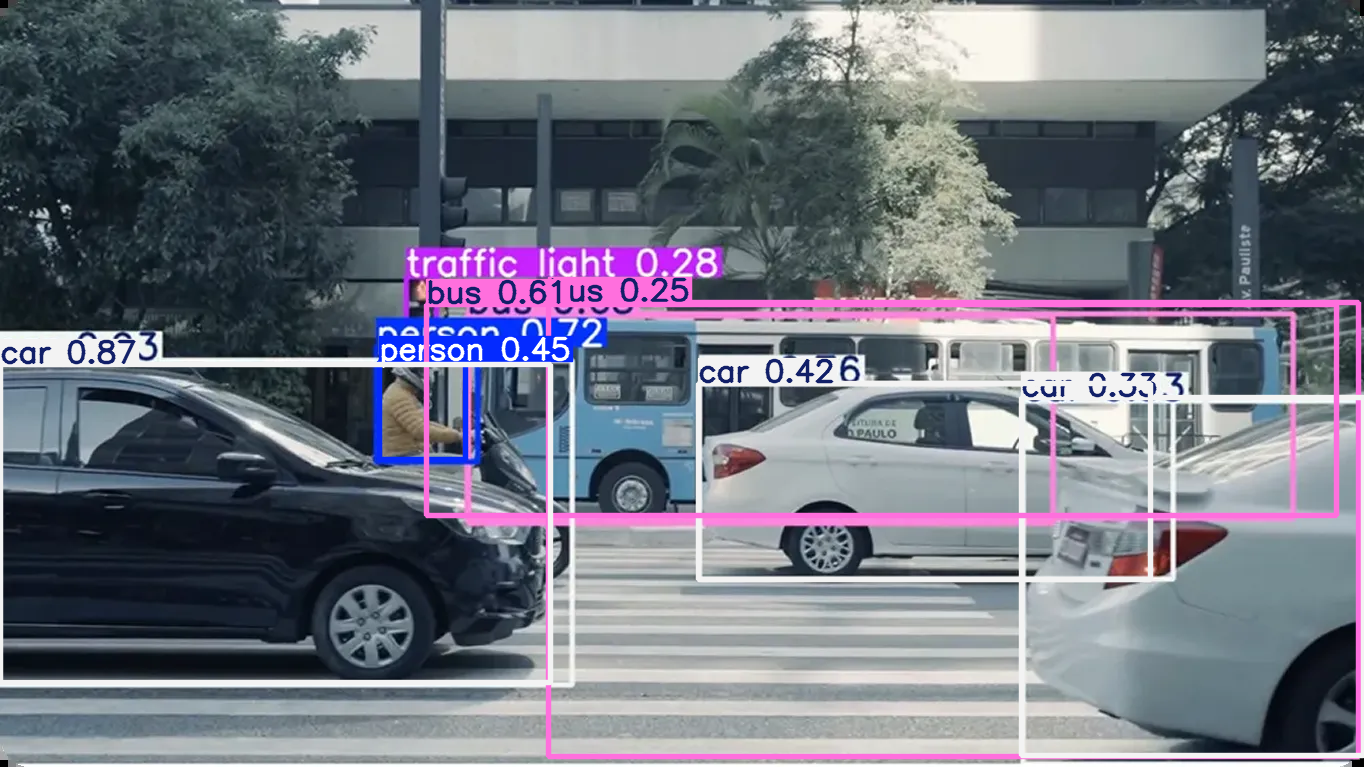

In [ ]:
image_url = 'https://cdn.prod.website-files.com/680a070c3b99253410dd3df5/69288730c05081b367341556_Collision-prediction_Fig%201.webp'

# Perform inference on the image
results = model(image_url)

# Show the results
for r in results:
    r.show()

In [ ]:
# Install YOLOv8
!pip install ultralytics -q

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Check if GPU is available
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.9.0+cpu (CPU)


In [ ]:
# Download sample KITTI stereo images (Left and Right)
!wget -O kitti_left.png https://raw.githubusercontent.com/bostondiditeam/kitti/refs/heads/master/images/left/000274.png
!wget -O kitti_right.png https://raw.githubusercontent.com/bostondiditeam/kitti/refs/heads/master/images/right/000274.png

# Load images
imgL = cv2.imread('kitti_left.png')
imgR = cv2.imread('kitti_right.png')

# KITTI Calibration Parameters (Approximate for this sequence)
# Focal length (f) in pixels and Baseline (b) in meters
f = 718.8560
b = 0.537

print("Images and calibration data loaded.")

--2025-12-07 07:14:07--  https://raw.githubusercontent.com/bostondiditeam/kitti/refs/heads/master/images/left/000274.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 881205 (861K) [image/png]
Saving to: ‘kitti_left.png’

kitti_left.png      100%[===================>] 860.55K  --.-KB/s    in 0.02s   

2025-12-07 07:14:07 (47.2 MB/s) - ‘kitti_left.png’ saved [881205/881205]

--2025-12-07 07:14:07--  https://raw.githubusercontent.com/bostondiditeam/kitti/refs/heads/master/images/right/000274.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 20

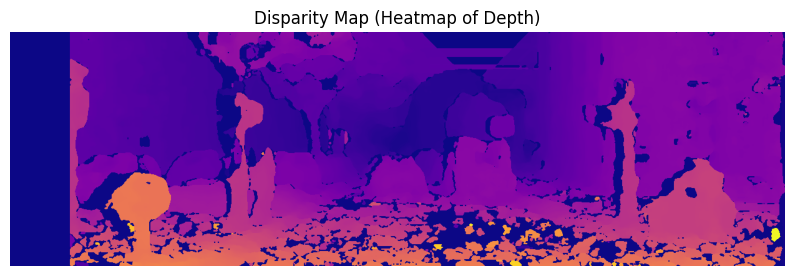

In [ ]:
def compute_disparity(imgL, imgR):
    # Convert to grayscale
    grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
    grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

    # SGBM Parameters (Tuned for KITTI)
    window_size = 3
    min_disp = 0
    num_disp = 16 * 6  # Must be divisible by 16
    stereo = cv2.StereoSGBM_create(minDisparity=min_disp,
                                   numDisparities=num_disp,
                                   blockSize=16,
                                   P1=8 * 3 * window_size ** 2,
                                   P2=32 * 3 * window_size ** 2,
                                   disp12MaxDiff=1,
                                   uniquenessRatio=10,
                                   speckleWindowSize=100,
                                   speckleRange=32)

    # Compute disparity
    disp = stereo.compute(grayL, grayR).astype(np.float32) / 16.0
    return disp

# Generate the map
disparity_map = compute_disparity(imgL, imgR)

# Visualize Disparity
plt.figure(figsize=(10, 5))
plt.imshow(disparity_map, cmap='plasma')
plt.title('Disparity Map (Heatmap of Depth)')
plt.axis('off')
plt.show()


0: 224x640 2 persons, 1 bicycle, 15 cars, 1 bus, 20.5ms
Speed: 1.3ms preprocess, 20.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)

Detected 19 objects.


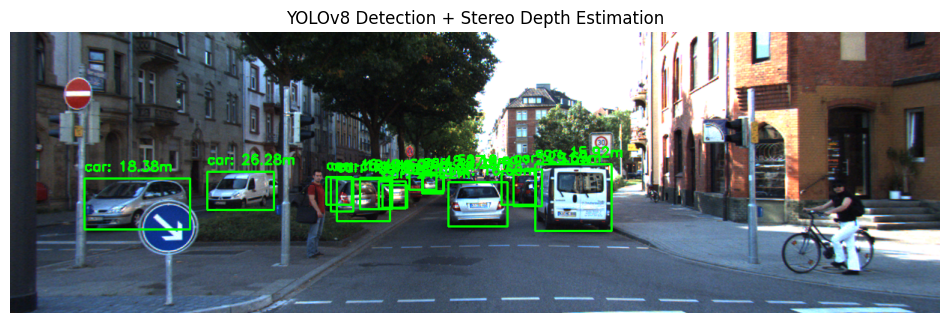

In [ ]:
# Load YOLOv8 model (using 'n' for nano, or 's' for small)
model = YOLO('yolov8n.pt')

# Run inference
results = model(imgL)

# Copy image for drawing
output_img = imgL.copy()
detected_boxes = results[0].boxes

print(f"\nDetected {len(detected_boxes)} objects.")

for box in detected_boxes:
    # Get Class ID and Name
    cls_id = int(box.cls[0])
    class_name = results[0].names[cls_id]

    # Filter: Only process 'car' or 'truck'
    if class_name in ['car', 'truck']:

        # Get Bounding Box Coordinates (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # --- DEPTH ESTIMATION STRATEGY ---
        # We extract the disparity values from the center region of the bounding box.
        # This avoids background noise at the edges of the box.

        # Define a center region (e.g., middle 50% of the box)
        h, w = y2 - y1, x2 - x1
        center_y1, center_y2 = y1 + int(h*0.25), y2 - int(h*0.25)
        center_x1, center_x2 = x1 + int(w*0.25), x2 - int(w*0.25)

        # Crop Disparity Map to this region
        disp_crop = disparity_map[center_y1:center_y2, center_x1:center_x2]

        # Calculate Median Disparity (Robust to noise)
        # Filter out invalid disparity values (<=0)
        valid_disp = disp_crop[disp_crop > 0]

        if len(valid_disp) > 0:
            avg_disp = np.median(valid_disp)

            # Calculate Depth (Z)
            depth = (f * b) / avg_disp

            # Draw Box and Depth Label
            cv2.rectangle(output_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{class_name}: {depth:.2f}m"
            cv2.putText(output_img, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display Final Result
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('YOLOv8 Detection + Stereo Depth Estimation')
plt.axis('off')
plt.show()


0: 224x640 2 persons, 1 bicycle, 15 cars, 1 bus, 19.8ms
Speed: 1.1ms preprocess, 19.8ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 640)


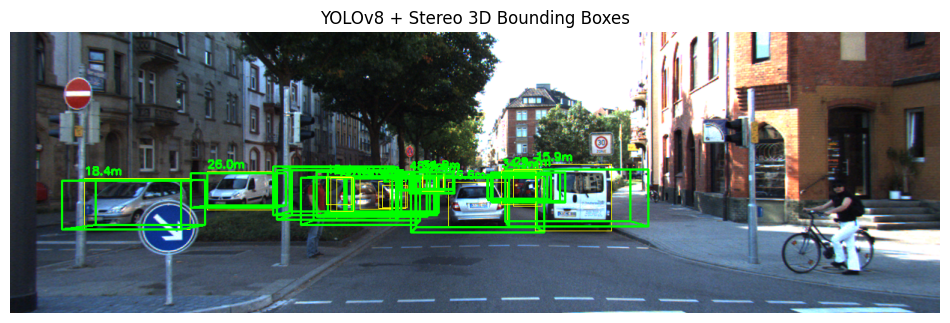

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# --- 1. CONFIGURATION ---

# KITTI Camera Intrinsics (P2 Matrix approx for this sequence)
# f = focal length, (cx, cy) = principal point
f = 718.8560
cx = 607.1928
cy = 185.2157
b = 0.537  # Baseline in meters

# Average Car Dimensions in KITTI (Height, Width, Length) in meters
# We use this because pure YOLOv8 doesn't predict 3D size.
CAR_H, CAR_W, CAR_L = 1.6, 1.6, 3.9

# --- 2. HELPER FUNCTIONS ---

def project_3d_box(img, center_x, center_y, center_z, dimensions):
    """
    Calculates 3D corners and projects them back to 2D image plane.
    """
    h, w, l = dimensions

    # 3D corners relative to center (0,0,0)
    # Order: Front-face (4 pts), Back-face (4 pts)
    # Coordinates: x (right), y (down), z (forward)
    x_corners = [l/2, l/2, -l/2, -l/2, l/2, l/2, -l/2, -l/2]
    y_corners = [0, 0, 0, 0, -h, -h, -h, -h]
    z_corners = [w/2, -w/2, -w/2, w/2, w/2, -w/2, -w/2, w/2]

    # Shift corners to the actual 3D location (center_x, center_y, center_z)
    # We assume the object is at the ground level, so we shift Y up by height
    corners_3d = np.array([x_corners, y_corners, z_corners])

    # Rotation (Simple fixed rotation for demo: 0 rad)
    # In a real app, you'd use a rotation matrix here.

    # Add translation (World Coordinates)
    corners_3d[0, :] = corners_3d[0, :] + center_x
    corners_3d[1, :] = corners_3d[1, :] + center_y
    corners_3d[2, :] = corners_3d[2, :] + center_z

    # Project to 2D (Camera Coordinates -> Image Pixels)
    # x_img = (x * f) / z + cx
    corners_2d = np.zeros((2, 8))
    corners_2d[0, :] = (corners_3d[0, :] * f) / corners_3d[2, :] + cx
    corners_2d[1, :] = (corners_3d[1, :] * f) / corners_3d[2, :] + cy

    return corners_2d.astype(int)

def draw_3d_box(img, corners):
    """Draws lines connecting the projected 2D points."""
    # Front face
    for i in range(4):
        cv2.line(img, (corners[0, i], corners[1, i]),
                 (corners[0, (i+1)%4], corners[1, (i+1)%4]), (0, 255, 0), 2)

    # Back face
    for i in range(4, 8):
        cv2.line(img, (corners[0, i], corners[1, i]),
                 (corners[0, 4 + (i+1)%4], corners[1, 4 + (i+1)%4]), (0, 255, 0), 2)

    # Connecting lines
    for i in range(4):
        cv2.line(img, (corners[0, i], corners[1, i]),
                 (corners[0, i+4], corners[1, i+4]), (0, 255, 0), 2)


# --- 3. MAIN PIPELINE ---

# Load Model
model = YOLO('yolov8n.pt')
results = model(imgL)
output_img = imgL.copy()

# Process Detections
for box in results[0].boxes:
    if results[0].names[int(box.cls[0])] in ['car', 'truck']:

        # 1. Get 2D Box
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        u = (x1 + x2) // 2  # Center X (pixel)
        v = (y1 + y2) // 2  # Center Y (pixel)

        # 2. Get Depth (Z) from Disparity Map (from previous step)
        # Crop center region for robust disparity
        h_box, w_box = y2 - y1, x2 - x1
        disp_crop = disparity_map[y1 + int(h_box*0.3):y2 - int(h_box*0.3),
                                  x1 + int(w_box*0.3):x2 - int(w_box*0.3)]

        valid_disp = disp_crop[disp_crop > 0]

        if len(valid_disp) > 5:
            disp_val = np.median(valid_disp)
            Z = (f * b) / disp_val

            # 3. Calculate 3D Position (X, Y, Z)
            # X = (u - cx) * Z / f
            X = (u - cx) * Z / f
            # Y = (v - cy) * Z / f --> This is the center of the object in 3D
            # For KITTI, the camera is typically 1.65m above ground.
            # We can approximate the ground Y plane or just use the box center.
            Y = (v - cy) * Z / f + (CAR_H / 2)

            # 4. Project and Draw 3D Box
            corners_2d = project_3d_box(output_img, X, Y, Z, (CAR_H, CAR_W, CAR_L))

            # Draw standard 2D box for reference
            cv2.rectangle(output_img, (x1, y1), (x2, y2), (0, 255, 255), 1)

            # Draw 3D box
            draw_3d_box(output_img, corners_2d)

            label = f"{Z:.1f}m"
            cv2.putText(output_img, label, (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show Result
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('YOLOv8 + Stereo 3D Bounding Boxes')
plt.axis('off')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable

# --- Architecture ---
class OrientationNet(nn.Module):
    def __init__(self):
        super(OrientationNet, self).__init__()

        # Use a lightweight ResNet18 as the backbone
        self.features = models.resnet18(pretrained=True)
        # Remove the last fully connected layer
        self.features = nn.Sequential(*list(self.features.children())[:-1])

        # 2 bins (Front/Back)
        self.bins = 2

        # Head 1: Confidence (Which bin?)
        self.orientation = nn.Linear(512, self.bins)

        # Head 2: Cosine and Sine offsets for each bin
        self.confidence = nn.Linear(512, self.bins * 2)

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 512)

        # Predict Bin Probabilities
        ori = self.orientation(x)

        # Predict Angle Offsets
        conf = self.confidence(x)

        return ori, conf

# --- Pre-processing for the network ---
transform_orient = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
orient_model = OrientationNet().to(device)
orient_model.eval() # Set to eval mode

print("Orientation Network built.")

Orientation Network built.


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
def get_angle(ori, conf):
    """
    Decodes the Multi-Bin output into a rotation angle (radians).
    """
    # 1. Which bin has higher probability?
    bin_idx = torch.argmax(ori, dim=1).item()

    # 2. Get the cos/sin values for that bin
    # conf shape is [batch, 4] -> [cos_bin0, sin_bin0, cos_bin1, sin_bin1]
    cos_val = conf[0, bin_idx * 2].item()
    sin_val = conf[0, bin_idx * 2 + 1].item()

    # 3. Calculate angle correction
    offset = np.arctan2(sin_val, cos_val)

    # 4. Add bin center angle (Bin 0 centered at -90 deg, Bin 1 at +90 deg usually)
    # For simplicity in this demo, we assume raw regression output
    # Real implementations use specific bin centers.
    angle = offset

    return angle

In [ ]:
def project_3d_box_rotated(img, center_x, center_y, center_z, dim, angle):
    h, w, l = dim

    # 1. Create Rotation Matrix (Yaw around Y-axis)
    # KITTI uses a specific coordinate system where Y is down.
    c = np.cos(angle)
    s = np.sin(angle)

    # Rotation matrix around Y-axis
    R = np.array([
        [c,  0, s],
        [0,  1, 0],
        [-s, 0, c]
    ])

    # 2. Define 3D corners (Centered at 0,0,0)
    # x: right, y: down, z: forward
    x_corners = [l/2, l/2, -l/2, -l/2, l/2, l/2, -l/2, -l/2]
    y_corners = [0, 0, 0, 0, -h, -h, -h, -h]
    z_corners = [w/2, -w/2, -w/2, w/2, w/2, -w/2, -w/2, w/2]

    corners_3d = np.array([x_corners, y_corners, z_corners])

    # 3. Rotate
    corners_3d = np.dot(R, corners_3d)

    # 4. Translate to World Position
    corners_3d[0, :] += center_x
    corners_3d[1, :] += center_y
    corners_3d[2, :] += center_z

    # 5. Project to 2D
    corners_2d = np.zeros((2, 8))
    corners_2d[0, :] = (corners_3d[0, :] * f) / corners_3d[2, :] + cx
    corners_2d[1, :] = (corners_3d[1, :] * f) / corners_3d[2, :] + cy

    return corners_2d.astype(int)


0: 224x640 2 persons, 1 bicycle, 15 cars, 1 bus, 19.7ms
Speed: 1.1ms preprocess, 19.7ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 640)


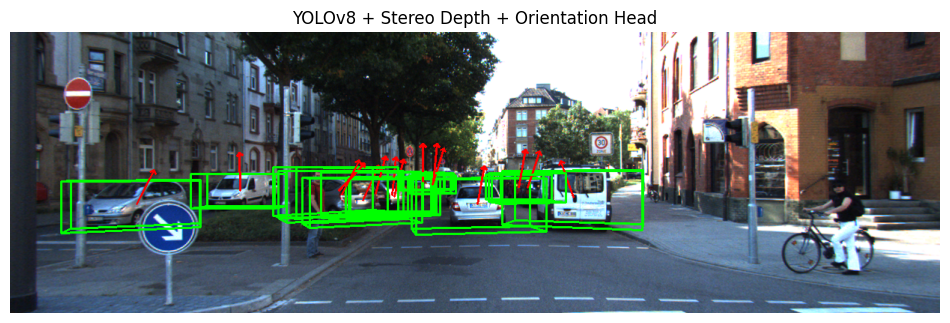

In [ ]:
# Load standard YOLO
model = YOLO('yolov8n.pt')
results = model(imgL)
output_img = imgL.copy()

for box in results[0].boxes:
    if results[0].names[int(box.cls[0])] == 'car':

        # --- 1. YOLO Detection ---
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # --- 2. Orientation Estimation ---
        # Crop the car from the image
        car_crop = imgL[y1:y2, x1:x2]

        if car_crop.size > 0:
            # Prepare for Network
            input_tensor = transform_orient(car_crop).unsqueeze(0).to(device)

            # Run Inference (Using our random-weight model for demo)
            # In production, load: orient_model.load_state_dict(torch.load('kitti_orient.pth'))
            ori_pred, conf_pred = orient_model(input_tensor)

            # Decode Angle
            angle = get_angle(ori_pred, conf_pred)

            # --- 3. Depth & 3D Box ---
            # (Same depth logic as before)
            h_box, w_box = y2 - y1, x2 - x1
            disp_crop = disparity_map[y1 + int(h_box*0.3):y2 - int(h_box*0.3),
                                      x1 + int(w_box*0.3):x2 - int(w_box*0.3)]
            valid_disp = disp_crop[disp_crop > 0]

            if len(valid_disp) > 5:
                disp_val = np.median(valid_disp)
                Z = (f * b) / disp_val

                # Center coordinates
                u = (x1 + x2) // 2
                v = (y1 + y2) // 2
                X = (u - cx) * Z / f
                Y = (v - cy) * Z / f + (1.65 / 2) # Ground adjustment

                # Draw Rotated Box
                corners = project_3d_box_rotated(output_img, X, Y, Z,
                                                 (1.6, 1.6, 3.9), angle) # Pass angle here

                draw_3d_box(output_img, corners)

                # Draw Arrow to show direction
                arrow_len = 50
                end_x = int(u + arrow_len * np.sin(angle))
                end_y = int(v + arrow_len * np.cos(angle)) # approx
                cv2.arrowedLine(output_img, (u, v), (end_x, end_y), (0, 0, 255), 2)

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('YOLOv8 + Stereo Depth + Orientation Head')
plt.axis('off')
plt.show()

Starting Video Processing...


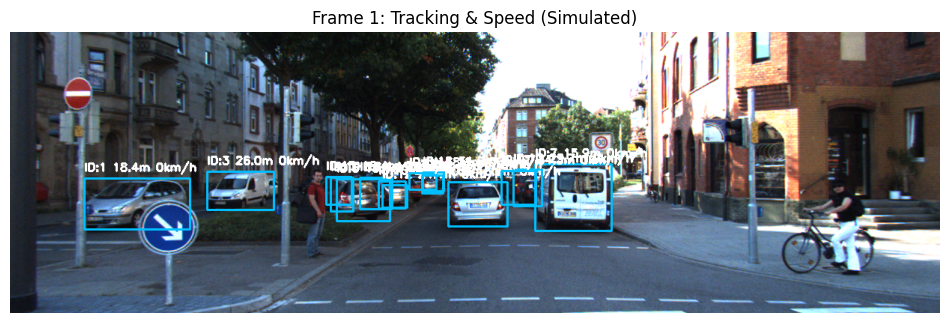

In [ ]:
import time
from collections import deque

class SpeedEstimator:
    def __init__(self, fps=10):
        # Store previous positions: {track_id: (x, z, timestamp)}
        self.previous_positions = {}
        self.fps = fps
        self.dt = 1.0 / fps # Time between frames (0.1s for KITTI)

    def update(self, track_id, current_x, current_z):
        speed_kmph = 0.0

        if track_id in self.previous_positions:
            prev_x, prev_z, prev_time = self.previous_positions[track_id]

            # 1. Calculate Euclidean Distance in 3D (X and Z only)
            # We ignore Y (height) as cars move flat on the road
            distance_m = np.sqrt((current_x - prev_x)**2 + (current_z - prev_z)**2)

            # 2. Calculate Speed (Distance / Time)
            # v = d / t
            speed_mps = distance_m / self.dt

            # Convert to km/h
            speed_kmph = speed_mps * 3.6

            # Simple noise filter: If speed is insane (> 200km/h), ignore it
            # (Depth estimation noise can cause massive jumps)
            if speed_kmph > 200:
                speed_kmph = 0.0

        # Update history
        self.previous_positions[track_id] = (current_x, current_z, time.time())

        return speed_kmph

# --- MAIN LOOP SIMULATION ---

# Initialize Estimator (KITTI is typically 10 FPS)
speed_tracker = SpeedEstimator(fps=10)

# Load Model
model = YOLO('yolov8n.pt')

# For this demo, we will process the SAME image twice to verify the code runs.
# In reality, you would use: for frame in video_stream:
fake_video_sequence = [imgL, imgL]

print("Starting Video Processing...")

for i, frame in enumerate(fake_video_sequence):
    # 1. Run Tracking (persist=True keeps IDs across frames)
    # This replaces model(frame)
    results = model.track(frame, persist=True, verbose=False)

    output_img = frame.copy()

    if results[0].boxes.id is not None:
        # Get boxes and Track IDs
        boxes = results[0].boxes.xyxy.cpu().numpy()
        track_ids = results[0].boxes.id.int().cpu().numpy()
        classes = results[0].boxes.cls.int().cpu().numpy()

        for box, track_id, cls in zip(boxes, track_ids, classes):
            # Only process cars
            if results[0].names[cls] in ['car', 'truck']:
                x1, y1, x2, y2 = map(int, box)

                # --- DEPTH CALCULATION (Reuse from previous steps) ---
                # (Assuming disparity_map is updated for each frame in a real loop)
                u = (x1 + x2) // 2
                v = (y1 + y2) // 2

                # Safe crop
                h_box, w_box = y2 - y1, x2 - x1
                disp_crop = disparity_map[y1 + int(h_box*0.3):y2 - int(h_box*0.3),
                                          x1 + int(w_box*0.3):x2 - int(w_box*0.3)]
                valid_disp = disp_crop[disp_crop > 0]

                if len(valid_disp) > 5:
                    disp_val = np.median(valid_disp)
                    Z = (f * b) / disp_val
                    X = (u - cx) * Z / f

                    # --- SPEED ESTIMATION ---
                    # We pass the Track ID and 3D Coordinates
                    speed = speed_tracker.update(track_id, X, Z)

                    # --- DRAWING ---
                    # Draw Bounding Box
                    cv2.rectangle(output_img, (x1, y1), (x2, y2), (255, 191, 0), 2)

                    # Label: ID + Dist + Speed
                    label = f"ID:{track_id} {Z:.1f}m {int(speed)}km/h"
                    cv2.putText(output_img, label, (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Show frame (In Colab, we just show the last one)
    if i == len(fake_video_sequence) - 1:
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Frame {i}: Tracking & Speed (Simulated)')
        plt.axis('off')
        plt.show()